# 1. Absenteeism

Arguably an issue plaguing all organisations. Peering into dataset of a Brazilian company reveals interesting insights, debunking myth and stereotypes.


# 2. About the dataset

The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.

Source:

Universidade Nove de Julho 

### Fields in the dataset include:

1. Individual identification (ID)
2. Reason for absence (ICD), various reasons.
3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons (summer (1), autumn (2), winter (3), spring (4))
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day 
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours (target variable, ie variable of interest)



# 3. Getting started



In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# 4. Load Dataset of Absenteeism per employee per absence

The following code above loads a csv file into a dataframe (`df`) and convert some of them into nominal variables. 


In [25]:
df = pd.read_csv('Absenteeism_at_work.csv')
df['ID']=pd.Categorical(df.ID)
df['Age']=pd.Categorical(df.Age)
df['Month_of_absence']=pd.Categorical(df.Month_of_absence)
df['Day_of_the_week']=pd.Categorical(df.Day_of_the_week)
df['Social_drinker']=pd.Categorical(df.Social_drinker)
df['Social_smoker']=pd.Categorical(df.Social_smoker)
df['Pet']=pd.Categorical(df.Pet)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null category
Reason_for_absence                 740 non-null int64
Month_of_absence                   740 non-null category
Day_of_the_week                    740 non-null category
Seasons                            740 non-null int64
Transportation_expense             740 non-null int64
Distance_from_Residence_to_Work    740 non-null int64
Service_time                       740 non-null int64
Age                                740 non-null category
Work_load_Average/day_             740 non-null float64
Hit_target                         740 non-null int64
Disciplinary_failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social_drinker                     740 non-null category
Social_smoker                      740 non-null category
Pet        

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


## 4.1 Explore Numerical Data

`describe()` command performs statistical analytics on numerical data. This command summarizes the central tendency, dispersion and shape of a dataset’s distribution. Not all the statistical analysis on variables carry meaning, eg. Reason_for_absence, Seasons, Pet etc. are nominal variables (ie. categorical) whereby a value is mapped to corresponding category; e.g. Day_of_the_week=1 means Sunday, 2 is Monday so on and forth. 



In [26]:
df.describe()

,Reason_for_absence,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,19.216216,2.544595,221.329730,29.631081,12.554054,271.490235,94.587838,0.054054,1.291892,1.018919,79.035135,172.114865,26.677027,6.924324
std,8.433406,1.111831,66.952223,14.836788,4.384873,39.058116,3.779313,0.226277,0.673238,1.098489,12.883211,6.034995,4.285452,13.330998
min,0.000000,1.000000,118.000000,5.000000,1.000000,205.917000,81.000000,0.000000,1.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,13.000000,2.000000,179.000000,16.000000,9.000000,244.387000,93.000000,0.000000,1.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,23.000000,3.000000,225.000000,26.000000,13.000000,264.249000,95.000000,0.000000,1.000000,1.000000,83.000000,170.000000,25.000000,3.000000
75%,26.000000,4.000000,260.000000,50.000000,16.000000,294.217000,97.000000,0.000000,1.000000,2.000000,89.000000,172.000000,31.000000,8.000000
max,28.000000,4.000000,388.000000,52.000000,29.000000,378.884000,100.000000,1.000000,4.000000,4.000000,108.000000,196.000000,38.000000,120.000000


## 4.2 Explore Categorical Data

### How many Employees are there? 

Well, count unique ID.
36 Unique IDs indicate data of 36 employees were compiled in the study.


In [27]:
np.unique(df['ID'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36], dtype=int64)

### 4.21 How many times were they absent?
Employee with ID number 3 certainly stood out for the wrong reason.

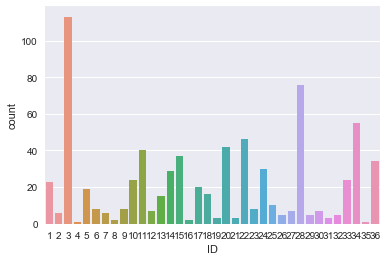

In [28]:
sns.countplot(df['ID'])

### 4.22 your suspicious is substantiated! More absenteeism on Monday!
More absenteeism on Monday than any other day of the week. In this data set. Day_of_the_week starts on Sunday (1), hence Monday is given number "2". On similar note, Winter seem to season of absenteeism!

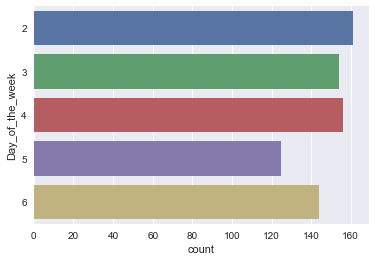

In [29]:
sns.countplot(y="Day_of_the_week", data=df )

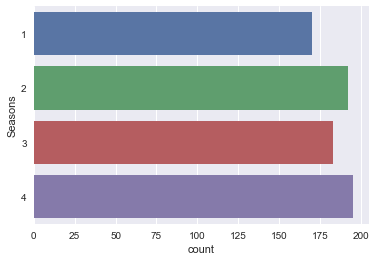

In [30]:
sns.countplot(y="Seasons", data=df )

# 5. Loading 3 year absenteeism hour by employee ID
The earlier database is based on per employee per absence basis, now we would like to load and explore absenteeism hour per employee over 3 year period!

In [31]:
df = pd.read_csv('Absenteeism_at_work_aggID.csv')

In [32]:
df['ID']=pd.Categorical(df.ID)
df['Age']=pd.Categorical(df.Age)
df['Social_drinker']=pd.Categorical(df.Social_drinker)
df['Social_smoker']=pd.Categorical(df.Social_smoker)
df['Pet']=pd.Categorical(df.Pet)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 14 columns):
ID                                 37 non-null category
Transportation_expense             37 non-null int64
Distance_from_Residence_to_Work    37 non-null int64
Service_time                       37 non-null int64
Age                                37 non-null category
Education                          37 non-null int64
Son                                37 non-null int64
Social_drinker                     37 non-null category
Social_smoker                      37 non-null category
Pet                                37 non-null category
Weight                             37 non-null int64
Height                             37 non-null int64
Body_mass_index                    37 non-null int64
Worker_Absent_hours_3Yrs           37 non-null int64
dtypes: category(5), int64(9)
memory usage: 5.6 KB


,ID,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Worker_Absent_hours_3Yrs
0,1,235,11,14,37,3,1,0,0,1,88,172,29,121
1,2,235,29,12,48,1,1,0,1,5,88,163,33,25
2,3,179,51,18,38,1,0,1,0,0,89,170,31,482
3,4,118,14,13,40,1,1,1,0,8,98,170,34,0
4,5,235,20,13,43,1,1,1,0,0,106,167,38,104


## 5.1 Number of employees in each age group

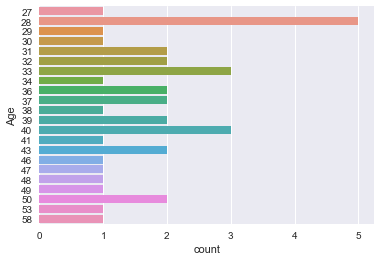

In [33]:
sns.countplot(y='Age', data=df)

## 5.2 Debunking Stereotypes:
Workplace is rife with stereotypes and generalisation. One such stereotype is the belief that older workers having higher absenteeism, presumably due to illness etc. However, data shows that they are not more likely to be absent. In fact, the most reliable workforce (in terms of low absenteeism) are those in their forties.

The round dots signify average, while spur above or below round dot represents 1 standard deviation.

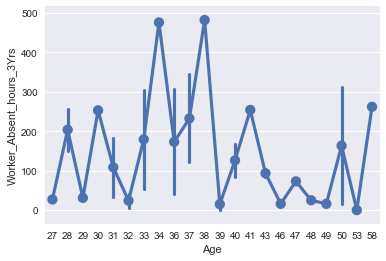

In [34]:
#sns.set(style="darkgrid")
ax=sns.pointplot(x="Age", y="Worker_Absent_hours_3Yrs", ci=68, data = df)


### 5.21 Do personal habits and traits having any relation with absenteeism? 
How about stereotypes of habits and traits of worker. Let the data do the talking!

Looks like company should hire social social smoker but not social drinker! The best worker (in terms of fewer hour absent) are those who smoke and drink socially. Moreover, more pets equals lower absenteeism hours. Surprisingly, sweetspot for low absenteeism hours seem to be workers that would be categorised as obese (BMI 33-36). It is time organisation collect own data to debunk some of the stereotypes and generalisations.

On the other hand, more kids (Son in the dataset) translates into higher absenteeism hours.



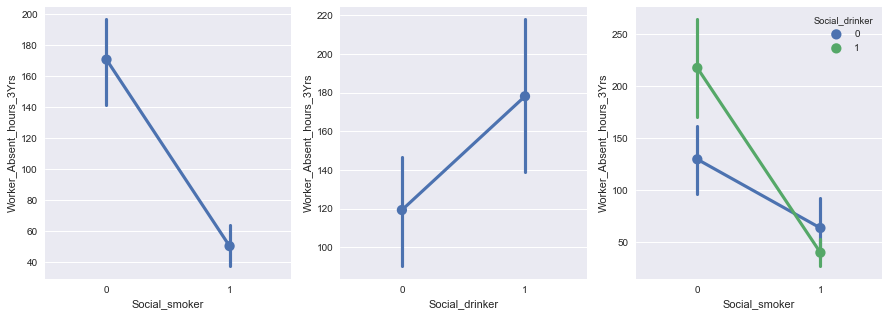

In [35]:
# Factor Plot
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
sns.pointplot(x="Social_smoker", y= "Worker_Absent_hours_3Yrs", ci=68, data = df, ax=ax1)
sns.pointplot(x="Social_drinker", y= "Worker_Absent_hours_3Yrs", ci=68, data = df, ax=ax2)
ax3=sns.pointplot(x="Social_smoker", y= "Worker_Absent_hours_3Yrs", hue="Social_drinker", ci=68, data = df, ax=ax3)

#sns.distplot(df['satisfaction_level'], norm_hist=False, kde=False, ax=ax1);
#sns.distplot(df['average_monthly_hours'], norm_hist=False, kde=False, ax=ax3);

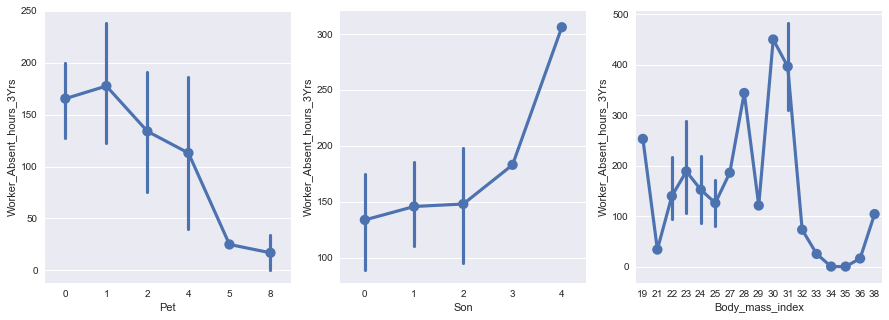

In [36]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
sns.pointplot(x="Pet", y= "Worker_Absent_hours_3Yrs", ci=68, data = df, ax=ax1)
sns.pointplot(x="Son", y= "Worker_Absent_hours_3Yrs", ci=68, data = df, ax=ax2)
sns.pointplot(x="Body_mass_index", y= "Worker_Absent_hours_3Yrs", ci=68, data = df, ax=ax3)
#ax=sns.pointplot(x="Pet", y= "Absenteeism_time_in_hours", ci=68, data = df)

## 5.3 Using Histogram, the prevalence or distribution of absenteeism, BMI and Service time are shown

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


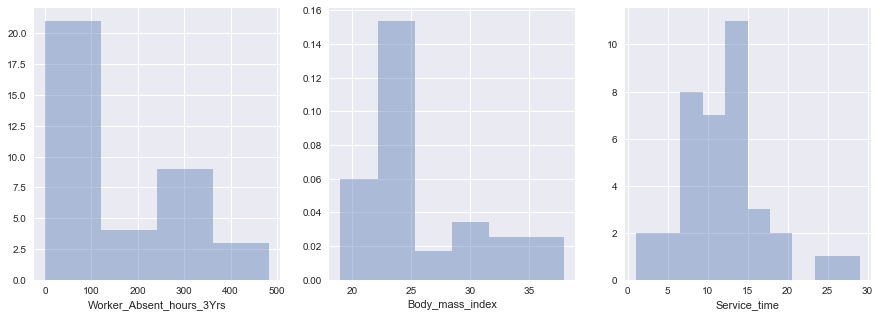

In [37]:
# Factor Plot
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))

sns.distplot(df['Worker_Absent_hours_3Yrs'], norm_hist=False, kde=False, ax=ax1);
sns.distplot(df['Body_mass_index'], norm_hist=True, kde=False, ax=ax2);
sns.distplot(df['Service_time'], norm_hist=False, kde=False, ax=ax3);

## 5.4 Now the correlation
Correlation is about how related is one variable to another, be it positively or negatively related. Positively correlated variables tend to increase together while negatively correlated variables tend to part in opposite directions. Here the variable of interest is Worker_Absent_hours_3Yrs.

The low correlation value of various variables with respect to Workers_Absent_hours_3Yrs indicates that none of the attributes is a strong predictor of absenteeism hours. In fact the variable with highest correlation to "Worker_Absent_hours_3Yrs" is transportation_expense at a magnitude of 0.17 only. But then, this is social science, whereby low correlations between the variable of interest and other variables are commonplace.

In another words, common stereotype or generalisation of abseenteeism  on the basis on these attributes 
(eg. Age, Education, Service_time, obsesity etc) are not likely to be supported by the dataset based on these low correlation.

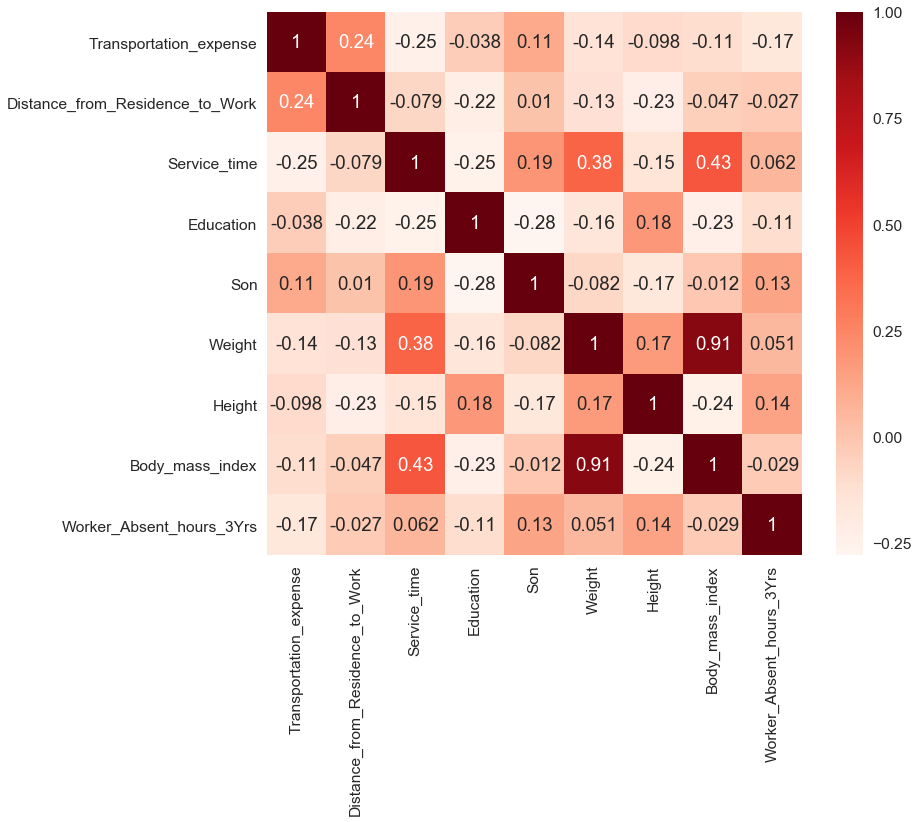

In [38]:
sns.set(rc={'figure.figsize':(12,10)})
sns.set_context("talk", font_scale=1.2)
    
sns.heatmap(df.corr(), cmap='Reds', annot=True);

# 6 Can absenteeism hour be predicted or modelled
A little recap

Section 4 is reporting and describing relationship between "number of absences" with individual worker and/or group of workers of certain characteristics.

Section 5 is reporting and describing relationship between "Worker_Absent_hour_3Yrs" of a group of workers of certain characteristics.

Section 6 will be about modelling then predicting "Worker_Absent_hour_3Yrs" of individual worker.

The low correlation values variables have with respect to "Worker_Absent_hours_3Yrs" is a sign that it will be difficult to model and predict absenteeism hour of individual (represented by "Worker_Absent_hours_3Yrs") based on other variables. Nonetheless, I shall try.


## 6.1 Build a Linear Regression to predict 3 year absenteeism hour
First reload the numerical dataset as linear regression only works on numerical variables.
Calculate the correlation between attributes and Worker_Absent_hour_3yrs


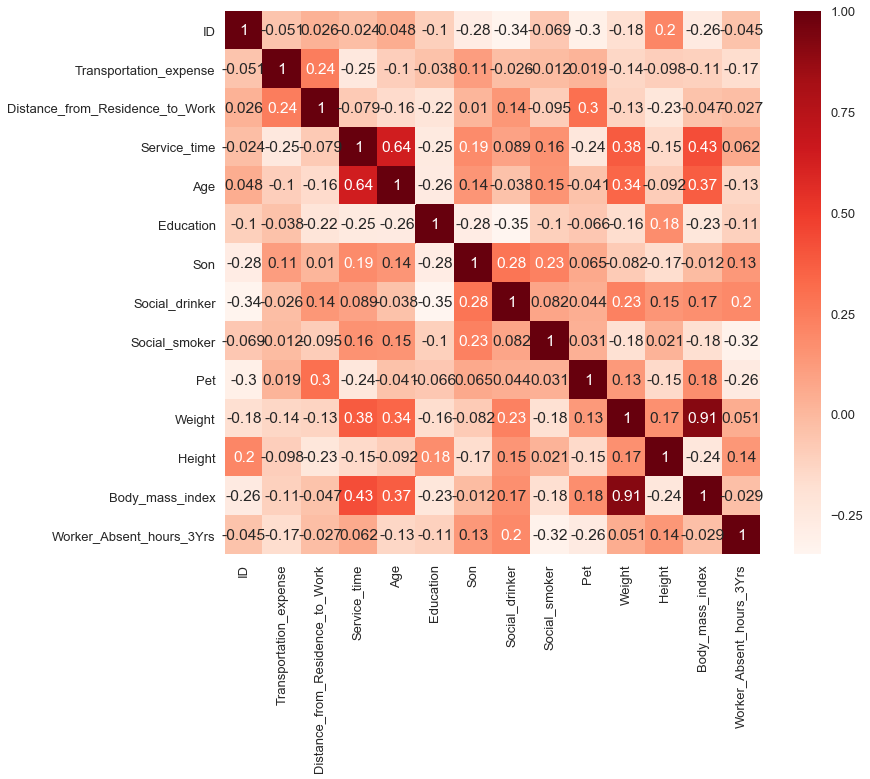

In [39]:
df = pd.read_csv('Absenteeism_at_work_aggID.csv')
sns.set(rc={'figure.figsize':(12,10)})
sns.set_context("talk", font_scale=1.0)
sns.heatmap(df.corr(), cmap='Reds', annot=True);

#### Choosing top 4 most correlated variables with 'Worker_Absent_hours_3Yrs'. 
The low correlation magnitudes indicates likely poor prediction model, but we shall try! The four variables chosen are 'Transportation_expense','Social_drinker','Social_smoker','Pet'

Specify the variable of interest (y) and other variables (X).
Train the model.

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables: the base dataset
#X = df[['Transportation_expense','Social_drinker','Social_smoker','Pet']]
X = df[['Transportation_expense','Social_drinker','Social_smoker','Pet']]
#X = df[['Transportation_expense','Distance_from_Residence_to_Work', 'Service_time', 'Age', 'Education', 'Son', 'Social_drinker', 'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index']]
#X = df[['Transportation_expense', 'Age', 'Son', 'Social_drinker', 'Social_smoker', 'Pet', 'Height']]
#X = df[['Social_drinker','Social_smoker']]
#X = df[['Social_drinker','Social_smoker','Pet']]
y = df['Worker_Absent_hours_3Yrs']

# Split the dataset into training dataset and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1076)
#from sklearn.metrics import accuracy_score

#Train the model and print out the interception and coefficient values
lm = LinearRegression()
lmmodel = lm.fit(X_train,y_train)

print(lmmodel.intercept_)
print(lmmodel.coef_)


253.29908054233996
[  -0.30434089   43.00923694 -144.73299082  -21.0882063 ]


## 6.2 Eyeball accuracy of prediction with a plot of Predicted versus actual value!
Ideally, predicted = actual and the diagram shows a diagonal straight line

The results indicate some visible agreement between actual and predicted. 

Coefficient of determination -1.8488232166495044
20     16
34    344
23    254
3       0
2     482
0     121
33     73
24     42
26     27
31     16
22     40
9     186
28    347
Name: Worker_Absent_hours_3Yrs, dtype: int64
[171.73572207 217.38685554 221.44045859  91.69044207 241.8312982
 160.69076513 156.73433356 181.77897143 197.30035681 135.21481528
 -90.82759184 102.08843104 142.64596772]


Text(0,0.5,'Predicted Worker_Absent_hours_3Yrs')

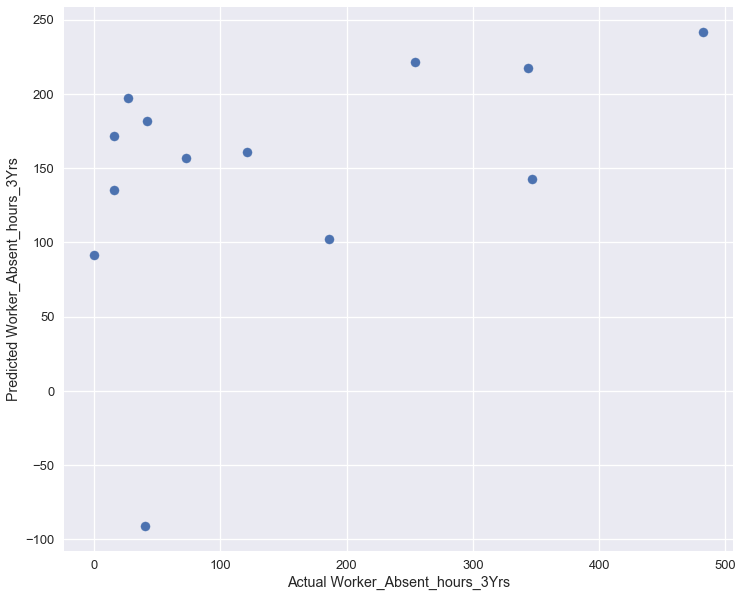

In [41]:
#accuracy_score(y_test,y_predictions)
y_predictions = lmmodel.predict(X_test)
y_predictions_train = lmmodel.predict(X_train)
print("Coefficient of determination", r2_score(y_predictions,y_test))
plt.scatter(y_test,y_predictions)

print(y_test)
print(y_predictions)
plt.xlabel("Actual Worker_Absent_hours_3Yrs")
plt.ylabel("Predicted Worker_Absent_hours_3Yrs")

#plt.scatter(y_train,y_predictions_train)
plt.xlabel("Actual Worker_Absent_hours_3Yrs")
plt.ylabel("Predicted Worker_Absent_hours_3Yrs")

Every dot is a worker. The modelling here is on per worker basis.

Prediction of absenteeism hour by individual worker is not as accurate as most would like. Nonetheless there 
is some general agreement between actual and prediction. Human behaviour is complex, probably more complex than variables in the dataset can captured, 

While clear relationship between variable of interest (Worker_Absent_hours_3yrs) and other variables is desirable, the lack of which is not all lost. It just means stereotypes and generalisations of individual worker based on those variables are not substantiated. Removing these stereotypes and generalisations is akin to removing contraints.

If this courier company had an unconscious bias for thinner individual staying close to workplace, removing 
these constraints would mean greater pool of potential workforce. 


# 7. Summary

The work was carried out with open sourced software and library at zero capital cost. 

Workplace is riddled with stereotypes and generalisation, perhaps what organisation can do is to test these stereotypes and generalisation with their own data. This courier company dataset provides insighful observation such as "Workers with lowest absenteesim hours tend to be the most obese" and my favourite "Hire workers who drink and smoke socially for they tend to have lowest absenteeism hour". Lack of correlation could be an opportunity to reexamine the stereotype and generalisation.

Adhering obsessively to its data driven management mantra, Google had implemented project Oxygen, set up People Analytic departments to lead the way in workplace performance. They even come up with such unconventional ideas such as "Managers dont hire".
https://rework.withgoogle.com/blog/the-evolution-of-project-oxygen/
 

## Trying log of variables

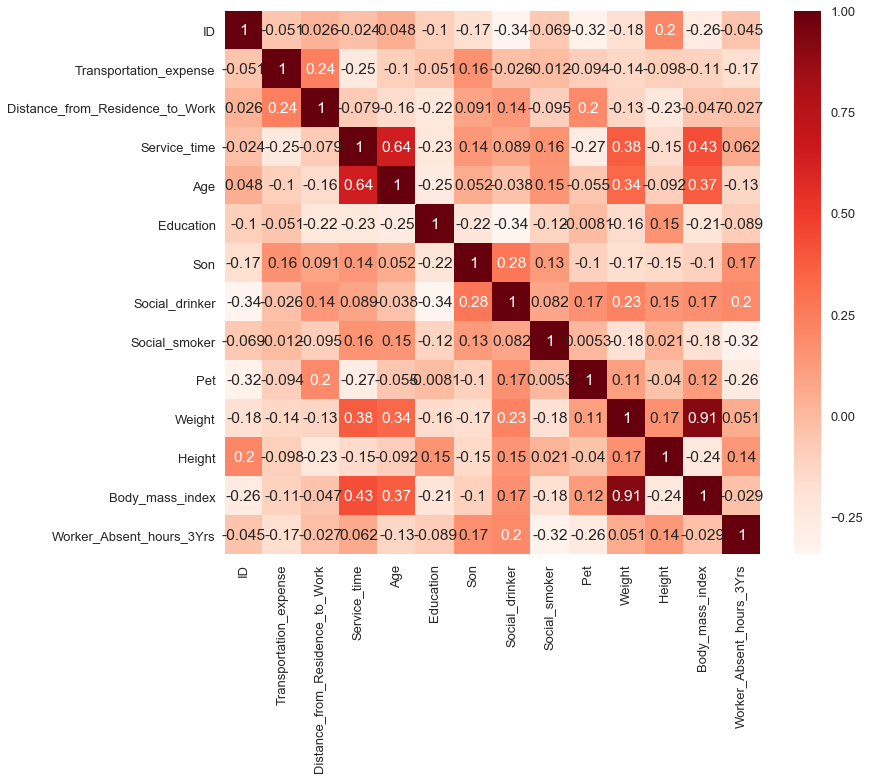

In [27]:
df = pd.read_csv('Sq_Absenteeism_at_work_aggID.csv')
sns.set(rc={'figure.figsize':(12,10)})
sns.set_context("talk", font_scale=1.0)
sns.heatmap(df.corr(), cmap='Reds', annot=True);

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define independent (X) and dependent (y) variables: the base dataset
#X = df[['Transportation_expense','Social_drinker','Social_smoker','Pet']]
#X = df[['Transportation_expense','Social_drinker','Social_smoker','Pet']]
#X = df[['Social_drinker','Social_smoker']]
#X = df[['Transportation_expense','Distance_from_Residence_to_Work', 'Service_time', 'Age', 'Education', 'Son', 'Social_drinker', 'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index']]
X = df[['Transportation_expense', 'Age', 'Son', 'Social_drinker', 'Social_smoker', 'Pet', 'Height']]
y = df['Worker_Absent_hours_3Yrs']

# Split the dataset into training dataset and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=558|5)
#from sklearn.metrics import accuracy_score

#Train the model and print out the interception and coefficient values
lm = LinearRegression()
lmmodel = lm.fit(X_train,y_train)

print(lmmodel.intercept_)
print(lmmodel.coef_)

-189.1830095321596
[  -0.59273477   -1.033615      6.24168202   85.20399415 -119.35494159
   -3.86058152    2.98668049]


Coefficient of determination -0.8644032343949841
20     16
15     16
19    306
32     16
24     42
14    253
18      6
6      30
28    347
25     83
9     186
22     40
Name: Worker_Absent_hours_3Yrs, dtype: int64
[149.48390541 206.8128643  306.32904004  87.13622627 170.07776766
 195.29403201 195.20849056  97.71110871 144.05880684  98.17540053
 111.28393613 -86.92200362]


Text(0,0.5,'Predicted Worker_Absent_hours_3Yrs')

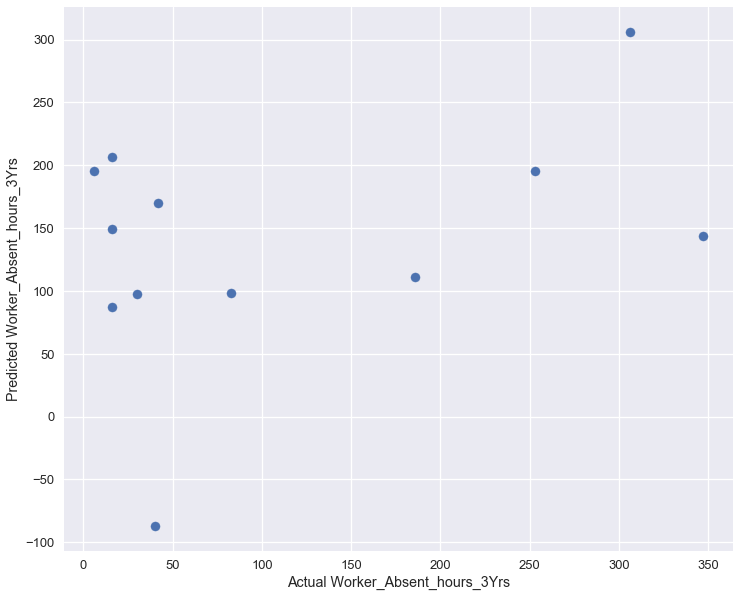

In [20]:
#accuracy_score(y_test,y_predictions)
y_predictions = lmmodel.predict(X_test)
print("Coefficient of determination", r2_score(y_predictions,y_test))
plt.scatter(y_test,y_predictions)
print(y_test)
print(y_predictions)
#plt.scatter(y_train,X_train)
plt.xlabel("Actual Worker_Absent_hours_3Yrs")
plt.ylabel("Predicted Worker_Absent_hours_3Yrs")

## How does the model compared with baseline (defined as average absenteeism hours of worker )?

In [83]:
#print(y_test, y_predictions)
print(y_test)
y_test_mean=np.mean(y_test)
print("y test mean", y_test_mean)
y_mean=np.array
print(y_mean)



20     16
15     16
19    306
32     16
24     42
14    253
18      6
6      30
28    347
25     83
9     186
22     40
Name: Worker_Absent_hours_3Yrs, dtype: int64
y test mean 111.75
<built-in function array>


Coefficient of determination -1.4962194799038895


Text(0,0.5,'Predicted Worker_Absent_hours_3Yrs')

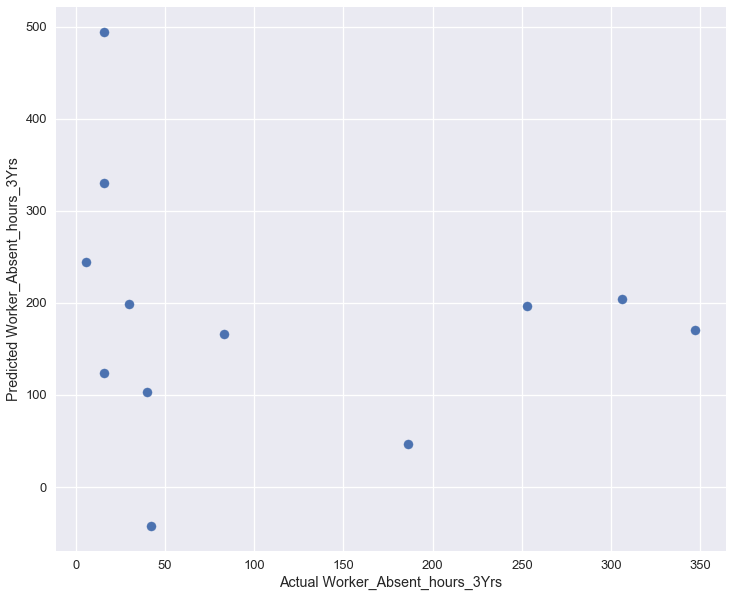

In [74]:
#accuracy_score(y_test,y_predictions)
y_predictions = lmmodel.predict(X_test)
print("Coefficient of determination", r2_score(y_predictions,y_test))
plt.scatter(y_test,y_predictions)
#plt.scatter(y_train,y_predictions)
plt.xlabel("Actual Worker_Absent_hours_3Yrs")
plt.ylabel("Predicted Worker_Absent_hours_3Yrs")

# Observation
The model produced only indicative of actual absenteeism as expected. 
This dataset is rather small at 36 instances.
Factors affecting 'Worker_absent_hour_3Yrs' could be more complicated than the variables provided in the dataset.
Nonetheless, this dataset does not support common stereotype (eg. obese worker has higher absenteeism) while supporting others (eg. Pet lovers has lower absenteeism)

from sklearn.metrics import accuracy_score

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

accuracy_score(y_test,predictions)

This establish a baseline that we know, if we use all of the variables, the model predicts at an accuracy of 79.3%

In [20]:
X = df[['satisfaction_level']]
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

accuracy_score(y_test,predictions)

0.766

This is based on our earlier finding that satisfaction level is a key factor that affects whether a staff will remain.

### Task: Try to simulate with different combinations, and find the combination with an satisfactory performance

p/s: Of course, it has to make sense

In [21]:
X = df[['satisfaction_level', 'number_project']]
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

accuracy_score(y_test,predictions)

0.772

## Prediction 

Once you have selected the right model, with the right combination of columns/features, next is to apply it within an unknown dataset and predict who are the staff that will churn or remain in the company. From there we can advise the management to take necessary actions.

In [22]:
predict = pd.read_csv('hr_predict.csv')

X_predict = predict[['satisfaction_level', 'number_project']]

predictions = logmodel.predict(X_predict)

X_predict = predict
X_predict.assign(left_predict = predictions)


,id,names,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,promotion_last_5years,role,salary,salary_class,role_class,left_predict
0,2237,Paul Mathey,0.74,0.72,4,176,3,0,0,sales,low,1,1,0
1,8127,Shawn Torres,0.72,0.88,3,224,3,0,0,technical,low,1,2,0
2,8146,Emily Staples,0.52,0.67,4,216,3,0,0,support,medium,2,3,0
3,14441,Jean Salazar,0.42,0.47,2,159,3,0,0,marketing,low,1,6,0
4,11909,Javier Folse,0.85,0.58,4,186,7,0,0,sales,medium,2,1,0
5,8792,Angela Williams,0.71,0.87,4,238,3,0,0,sales,low,1,1,0
6,11144,John Barnes,0.89,0.97,4,147,2,0,0,technical,low,1,2,0
7,2458,Ricky Humes,0.18,0.75,4,170,5,0,0,sales,low,1,1,1
8,11417,Caroline Lower,0.16,0.46,6,240,2,0,0,product_mng,low,1,5,1
9,1974,Kimberly Brennan,0.36,0.48,2,152,3,0,0,product_mng,medium,2,5,0


# Final Words

This is a simplified version of HR analytics that help us to identify key features. 

This is what we found:
1. Employees generally left when they are underworked (less than 150hr/month or 6hr/day)
2. Employees generally left when they are overworked (more than 250hr/month or 10hr/day)
3. Employees with either really high or low evaluations should be taken into consideration for high turnover rate
4. Employees with low to medium salaries are the bulk of employee turnover
5. Employees that had 2,6, or 7 project count was at risk of leaving the company
6. Employee satisfaction is the highest indicator for employee turnover.
7. Employee that had 4 and 5 years at company should be taken into consideration for high turnover rate

From the insights that we gained here, we are able to propose to management a few things:
1. Reduce working hours and number of projects to prevent staff from overworked.
2. Increase involvement so that staff get more opportunities to work on projects